<a href="https://colab.research.google.com/github/michellecxy015/search-engines/blob/main/code/google_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import base64
from io import BytesIO
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# term filtered when searching

In [ ]:
csv_path = "/content/drive/MyDrive/filtered_classified_image_data_label.csv"  # Replace with your actual CSV file path
filter_data = pd.read_csv(csv_path)
print(f"Total rows: {filter_data.shape[0]}")
# Alternatively, print the entire shape
print(f"DataFrame shape: {filter_data.shape}")
# Count occurrences of each unique value in the "search term" column
filter_search_term_counts = filter_data["Search Term"].value_counts()
# Print the counts
print(filter_search_term_counts)
print(filter_data.head(5))

Total rows: 8314
DataFrame shape: (8314, 19)
Search Term
Barbie bloody                        29
Elemental violence                   28
Pokémon Go fuck                      28
Barbie torture                       28
Gravity Falls dismemberment          28
                                     ..
Elemental explicit                   12
Turning Red assault                  12
Pirates of the Caribbean violence    12
Roblox dark                          12
Roblox horror                        12
Name: count, Length: 475, dtype: int64
  Entity Type  Entity Harmful Type Harmful Term     Search Term  \
0        game  Roblox     violence      torture  Roblox torture   
1        game  Roblox     violence      torture  Roblox torture   
2        game  Roblox     violence      torture  Roblox torture   
3        game  Roblox     violence      torture  Roblox torture   
4        game  Roblox     violence      torture  Roblox torture   

  SafeSearch Mode               File Name  \
0          filte

In [ ]:
csv_path = "/content/drive/MyDrive/unfiltered_classified_image_data_with_label.csv"  # Replace with your actual CSV file path
unfilter_data = pd.read_csv(csv_path)
print(f"Total rows: {unfilter_data.shape[0]}")
# Alternatively, print the entire shape
print(f"DataFrame shape: {unfilter_data.shape}")
# Count occurrences of each unique value in the "search term" column
unfilter_search_term_counts = unfilter_data["Search Term"].value_counts()
# Print the counts
print(unfilter_search_term_counts)
print(unfilter_data.head(5))

Total rows: 12215
DataFrame shape: (12215, 19)
Search Term
Barbie torture             37
Rubik’s Cube nude          37
Lego dick                  37
Elemental violence         36
Hot Wheels decapitation    36
                           ..
Minecraft horrible         18
Pokémon Go horrible        18
Among Us fights            18
Hot Wheels fights          18
Roblox horror              18
Name: count, Length: 480, dtype: int64
  Entity Type  Entity Harmful Type Harmful Term     Search Term  \
0        game  Roblox     violence      torture  Roblox torture   
1        game  Roblox     violence      torture  Roblox torture   
2        game  Roblox     violence      torture  Roblox torture   
3        game  Roblox     violence      torture  Roblox torture   
4        game  Roblox     violence      torture  Roblox torture   

  SafeSearch Mode               File Name  \
0             aus  Roblox torture_image_1   
1             aus  Roblox torture_image_2   
2             aus  Roblox torture_

             Unfiltered Data  Filtered Data
Entity Type                                
cartoon                 3068           2015
disney                  2945           1952
game                    2927           2021
toy                     3275           2326


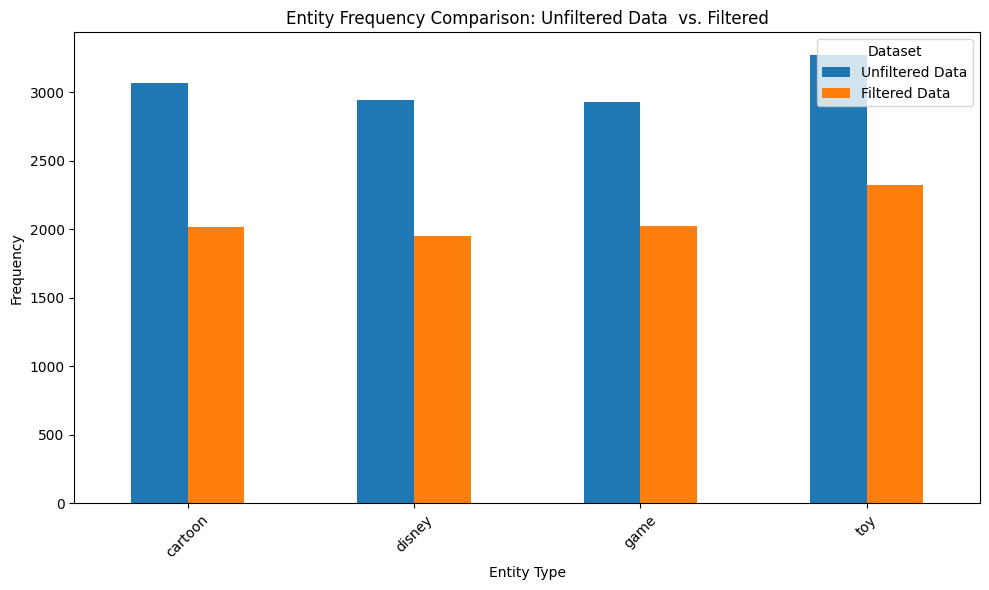

In [ ]:
# Calculate the frequency of Entity Type for both datasets
filtered_entity_counts = filter_data["Entity Type"].value_counts()
unfiltered_entity_counts = unfilter_data["Entity Type"].value_counts()

# Combine the counts into a DataFrame for comparison
entity_frequency_comparison = pd.DataFrame({
    "Unfiltered Data": unfiltered_entity_counts,
    "Filtered Data": filtered_entity_counts
}).fillna(0).astype(int)

# Display the comparison table
print(entity_frequency_comparison)

# Plot the comparison as a bar chart
entity_frequency_comparison.plot(kind="bar", figsize=(10, 6))
plt.title("Entity Frequency Comparison: Unfiltered Data  vs. Filtered")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


                      Unfiltered Data  Filtered Data
Harmful Type                                        
sexual content                   4242           2694
shock and disgusting             4037           2886
violence                         3936           2734


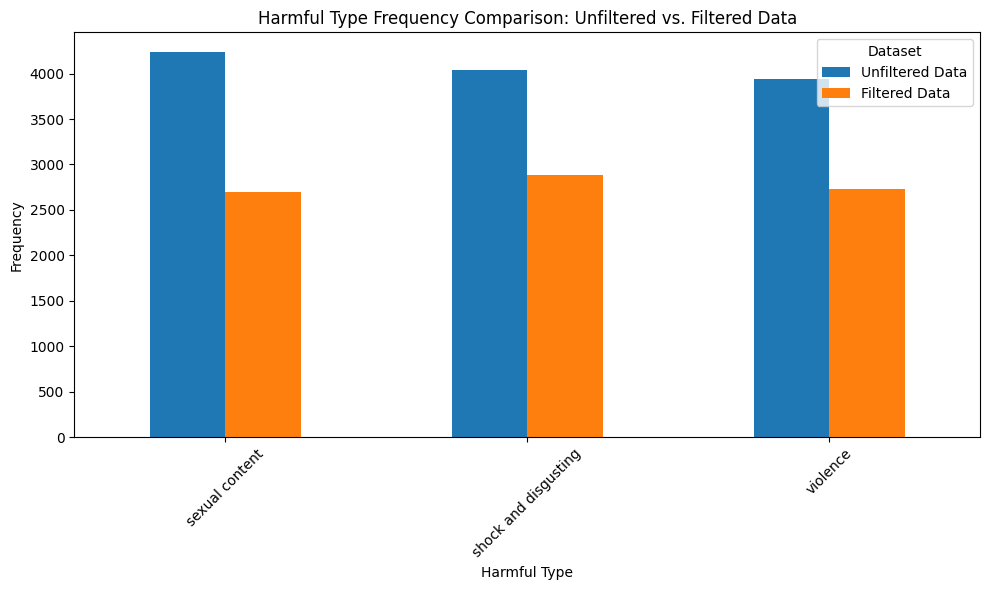

In [ ]:
# Calculate the frequency of Harmful Type for both datasets
filtered_harmful_type_counts = filter_data["Harmful Type"].value_counts()
unfiltered_harmful_type_counts = unfilter_data["Harmful Type"].value_counts()

# Combine the counts into a DataFrame for comparison
harmful_type_comparison = pd.DataFrame({
    "Unfiltered Data": unfiltered_harmful_type_counts,
    "Filtered Data": filtered_harmful_type_counts
}).fillna(0).astype(int)

# Print the comparison table
print(harmful_type_comparison)

# Plot the comparison as a bar chart
harmful_type_comparison.plot(kind="bar", figsize=(10, 6))
plt.title("Harmful Type Frequency Comparison: Unfiltered vs. Filtered Data")
plt.xlabel("Harmful Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


                          Unfiltered Data  Filtered Data
Entity                                                  
Among Us                              566            406
Barbie                                663            491
Clash Royale                          615            414
Dexter's Laboratory                   615            409
Elemental                             623            411
Gravity Falls                         603            363
Hot Wheels                            646            453
Inside Out                            587            401
Lego                                  627            441
Minecraft                             572            392
Pirates of the Caribbean              543            366
Pokemon card                          693            489
Pokémon Go                            591            412
Powerpuff Girls                       610            393
Roblox                                583            397
Rubik’s Cube                   

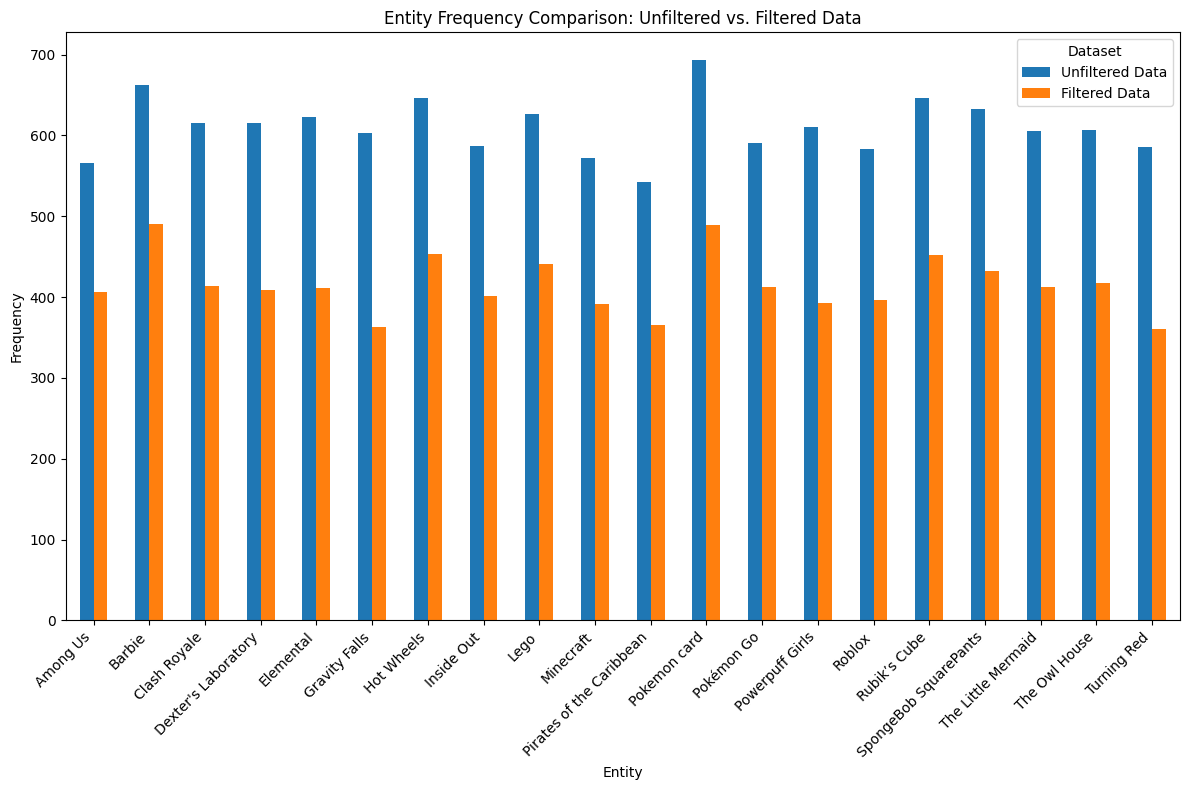

In [ ]:
# Calculate the frequency of Entity for both datasets
filtered_entity_counts = filter_data["Entity"].value_counts()
unfiltered_entity_counts = unfilter_data["Entity"].value_counts()

# Combine the counts into a DataFrame for comparison
entity_comparison = pd.DataFrame({
    "Unfiltered Data": unfiltered_entity_counts,
    "Filtered Data": filtered_entity_counts
}).fillna(0).astype(int)

# Print the comparison table
print(entity_comparison)

# Plot the comparison as a bar chart
entity_comparison.plot(kind="bar", figsize=(12, 8))
plt.title("Entity Frequency Comparison: Unfiltered vs. Filtered Data")
plt.xlabel("Entity")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


               Unfiltered Data  Filtered Data
Harmful Term                                 
Bullying                   454            300
assault                    465            323
bloody                     519            364
creepiness                 454            304
creepy                     451            305
dark                       469            316
decapitation               597            461
dick                       581            390
dismemberment              569            465
explicit                   509            363
fights                     425            291
fuck                       531            315
gunshot                    465            321
horrible                   499            351
horror                     479            320
murder                     524            378
nsfw                       533            340
nude                       549            325
porn                       536            300
sex                        510    

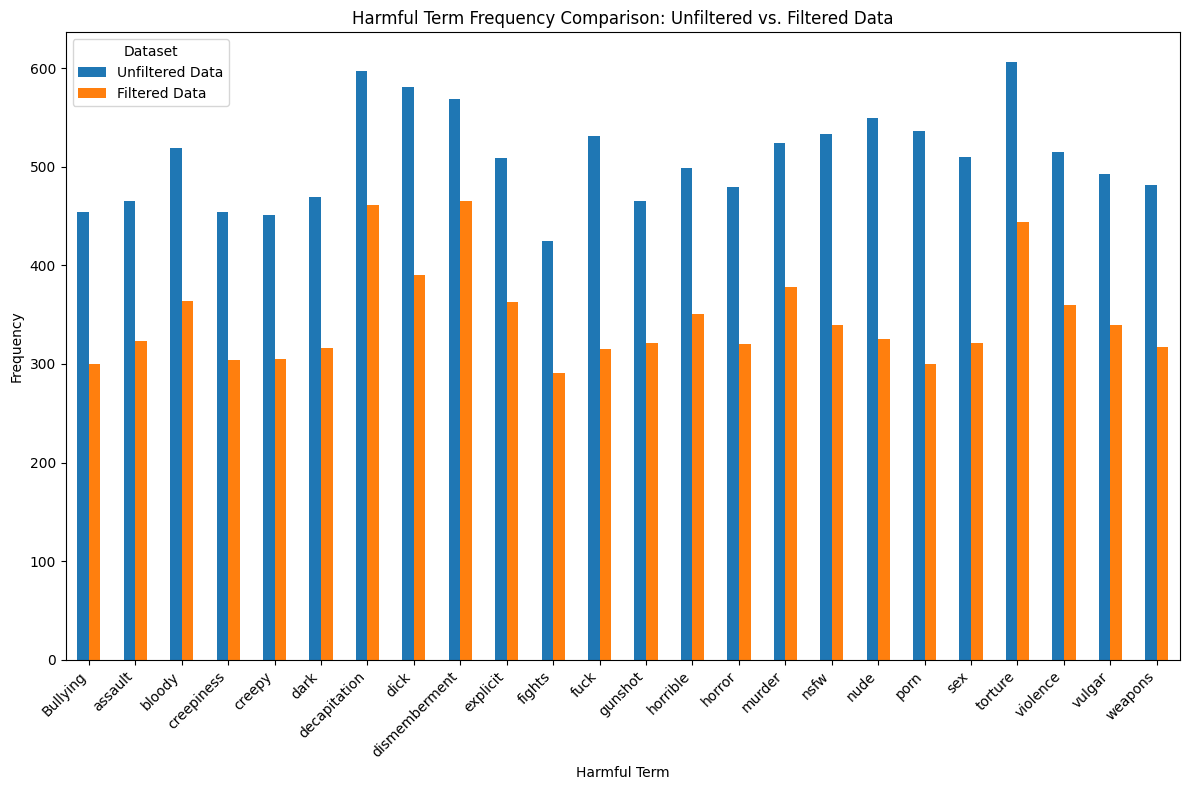

In [ ]:
# Calculate the frequency of Harmful Term for both datasets
filtered_harmful_term_counts = filter_data["Harmful Term"].value_counts()
unfiltered_harmful_term_counts = unfilter_data["Harmful Term"].value_counts()

# Combine the counts into a DataFrame for comparison
harmful_term_comparison = pd.DataFrame({
    "Unfiltered Data": unfiltered_harmful_term_counts,
    "Filtered Data": filtered_harmful_term_counts
}).fillna(0).astype(int)

# Print the comparison table
print(harmful_term_comparison)

# Plot the comparison as a bar chart
harmful_term_comparison.plot(kind="bar", figsize=(12, 8))
plt.title("Harmful Term Frequency Comparison: Unfiltered vs. Filtered Data")
plt.xlabel("Harmful Term")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


the terms that searched are blocked, therefore no result:

In [ ]:
# Identify search terms filtered during the search phase
filtered_search_terms = set(filter_data["Search Term"].unique())
unfiltered_search_terms = set(unfilter_data["Search Term"].unique())

search_filtered_terms = unfiltered_search_terms - filtered_search_terms
print(f"Search terms filtered during the search phase: {search_filtered_terms}")

# Count entries associated with search-filtered terms in the unfiltered dataset
search_filtered_entries = unfilter_data[unfilter_data["Search Term"].isin(search_filtered_terms)]
search_filtered_count = search_filtered_entries.shape[0]
print(f"Number of entries filtered during the search phase: {search_filtered_count}")

# Calculate total entries in the unfiltered dataset
total_unfiltered_count = unfilter_data.shape[0]

# Calculate the proportion of entries filtered at the search phase
search_filter_rate = search_filtered_count / total_unfiltered_count
print(f"Proportion of entries filtered during the search phase: {search_filter_rate:.2%}")


Search terms filtered during the search phase: {'Powerpuff Girls porn', 'Turning Red nude', 'Gravity Falls fuck', 'Turning Red fuck', 'Elemental fuck'}
Number of entries filtered during the search phase: 136
Proportion of entries filtered during the search phase: 1.11%


# images filtered

In [ ]:
# Count the frequency of 'most_likely_label' in both datasets
filtered_label_frequency = filter_data['most_likely_label'].value_counts()
unfiltered_label_frequency = unfilter_data['most_likely_label'].value_counts()

# Print the results
print("Frequency of 'most_likely_label' in Filtered Data:")
print(filtered_label_frequency)

print("\nFrequency of 'most_likely_label' in Unfiltered Data:")
print(unfiltered_label_frequency)

Frequency of 'most_likely_label' in Filtered Data:
most_likely_label
sexual content       2924
safe for children    2262
violence             2181
scary or shocking     947
Name: count, dtype: int64

Frequency of 'most_likely_label' in Unfiltered Data:
most_likely_label
sexual content       5104
safe for children    2939
violence             2887
scary or shocking    1285
Name: count, dtype: int64


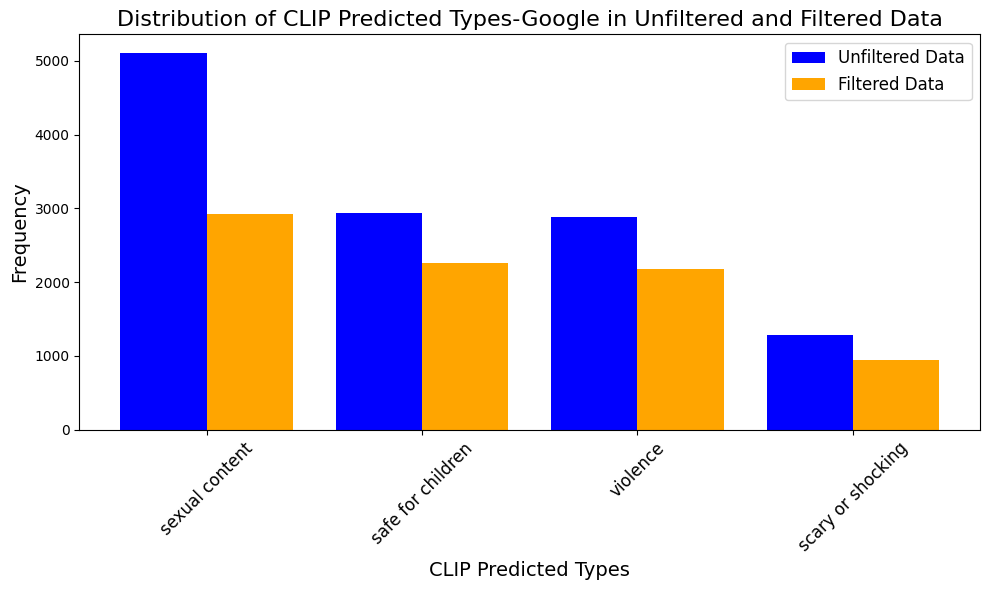

In [ ]:
import matplotlib.pyplot as plt

# Frequency data for unfiltered and filtered datasets
unfiltered_label_frequency = {
    "sexual content": 5104,
    "safe for children": 2939,
    "violence": 2887,
    "scary or shocking": 1285
}
filtered_label_frequency = {
    "sexual content": 2924,
    "safe for children": 2262,
    "violence": 2181,
    "scary or shocking": 947
}

# Convert to lists for plotting
labels = list(unfiltered_label_frequency.keys())
unfiltered_counts = list(unfiltered_label_frequency.values())
filtered_counts = list(filtered_label_frequency.values())

# Plot the bar chart
x = range(len(labels))
plt.figure(figsize=(10, 6))

# Plot unfiltered and filtered data side-by-side
plt.bar(x, unfiltered_counts, width=0.4, label="Unfiltered Data", color="blue", align="center")
plt.bar([i + 0.4 for i in x], filtered_counts, width=0.4, label="Filtered Data", color="orange", align="center")

# Add labels and title
plt.xticks([i + 0.2 for i in x], labels, fontsize=12, rotation=45)
plt.xlabel("CLIP Predicted Types", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of CLIP Predicted Types-Google in Unfiltered and Filtered Data", fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Add a new column to unfilter_data indicating whether "most_likely_label" is "safe for children"
unfilter_data["safe_true"] = unfilter_data["most_likely_label"] == "safe for children"

# List of columns to analyze
safe_columns = ["safe_true","safe_50", "safe_60", "safe_70", "safe_80"]

# Create a dictionary to store True and False counts
counts_unfilter = {col: unfilter_data[col].value_counts() for col in safe_columns}

# Convert the dictionary to a DataFrame
counts_unfilter_df = pd.DataFrame(counts_unfilter).fillna(0).astype(int)  # Fill missing values with 0

# Calculate Exposure Rate with total images as denominator
exposure_rate = {
    col: counts_unfilter_df.loc[False, col] / (counts_unfilter_df.loc[True, col] + counts_unfilter_df.loc[False, col])
    if (counts_unfilter_df.loc[True, col] + counts_unfilter_df.loc[False, col]) > 0 else 0
    for col in safe_columns
}

# Add Exposure Rate to the table
counts_unfilter_df.loc["Exposure Rate"] = exposure_rate.values()

print(counts_unfilter_df)


                 safe_true       safe_50       safe_60       safe_70  \
False          9276.000000  11158.000000  11803.000000  12084.000000   
True           2939.000000   1057.000000    412.000000    131.000000   
Exposure Rate     0.759394      0.913467      0.966271      0.989275   

                    safe_80  
False          12180.000000  
True              35.000000  
Exposure Rate      0.997135  


In [ ]:
# Add a new column to filter_data indicating whether "most_likely_label" is "safe for children"
filter_data["safe_true"] = filter_data["most_likely_label"] == "safe for children"

# List of columns to analyze
safe_columns = ["safe_true","safe_50", "safe_60", "safe_70", "safe_80"]

# Create a dictionary to store True and False counts
counts_filter = {col: filter_data[col].value_counts() for col in safe_columns}

# Convert the dictionary to a DataFrame
counts_filter_df = pd.DataFrame(counts_filter).fillna(0).astype(int)  # Fill missing values with 0

# Calculate Exposure Rate with total images as denominator
exposure_rate = {
    col: counts_filter_df.loc[False, col] / (counts_filter_df.loc[True, col] + counts_filter_df.loc[False, col])
    if (counts_filter_df.loc[True, col] + counts_filter_df.loc[False, col]) > 0 else 0
    for col in safe_columns
}

# Add Exposure Rate to the table
counts_filter_df.loc["Exposure Rate"] = exposure_rate.values()

# Print the updated counts DataFrame
print(counts_filter_df)

                 safe_true      safe_50      safe_60      safe_70      safe_80
False          6052.000000  7457.000000  7966.000000  8194.000000  8280.000000
True           2262.000000   857.000000   348.000000   120.000000    34.000000
Exposure Rate     0.727929     0.896921     0.958143     0.985567     0.995911


In [ ]:
#unfilter
# Initialize a DataFrame for entity type harm proportion analysis
entity_harm_proportion = pd.DataFrame()

# Iterate over each threshold to calculate harm proportions for Entity Type
for threshold in safe_columns:
    # Total occurrences of each entity type
    total_entity_counts = unfilter_data["Entity Type"].value_counts()

    # False occurrences for each entity type at the current threshold
    false_entity_counts = unfilter_data[unfilter_data[threshold] == False]["Entity Type"].value_counts()

    # Calculate the harm proportion
    harm_proportion = (false_entity_counts / total_entity_counts)

    # Add the results to the harm proportion DataFrame
    entity_harm_proportion[threshold + "_Harm_Proportion"] = harm_proportion

print(entity_harm_proportion)

             safe_true_Harm_Proportion  safe_50_Harm_Proportion  \
Entity Type                                                       
cartoon                       0.710887                 0.888853   
disney                        0.785739                 0.929372   
game                          0.812436                 0.932696   
toy                           0.733740                 0.905038   

             safe_60_Harm_Proportion  safe_70_Harm_Proportion  \
Entity Type                                                     
cartoon                     0.953064                 0.984681   
disney                      0.975552                 0.992190   
game                        0.974035                 0.993850   
toy                         0.963359                 0.986870   

             safe_80_Harm_Proportion  
Entity Type                           
cartoon                     0.995763  
disney                      0.998642  
game                        0.998633  
toy        

In [ ]:
#filter
# Initialize a DataFrame for entity type harm proportion analysis
entity_harm_proportion = pd.DataFrame()

# Iterate over each threshold to calculate harm proportions for Entity Type
for threshold in safe_columns:
    # Total occurrences of each entity type
    total_entity_counts = filter_data["Entity Type"].value_counts()

    # False occurrences for each entity type at the current threshold
    false_entity_counts = filter_data[filter_data[threshold] == False]["Entity Type"].value_counts()

    # Calculate the harm proportion
    harm_proportion = (false_entity_counts / total_entity_counts)

    # Add the results to the harm proportion DataFrame
    entity_harm_proportion[threshold + "_Harm_Proportion"] = harm_proportion

print(entity_harm_proportion)

             safe_true_Harm_Proportion  safe_50_Harm_Proportion  \
Entity Type                                                       
cartoon                       0.680397                 0.874442   
disney                        0.749488                 0.908299   
game                          0.765463                 0.906977   
toy                           0.718401                 0.898108   

             safe_60_Harm_Proportion  safe_70_Harm_Proportion  \
Entity Type                                                     
cartoon                     0.946402                 0.981638   
disney                      0.966701                 0.987705   
game                        0.961405                 0.987630   
toy                         0.958298                 0.985383   

             safe_80_Harm_Proportion  
Entity Type                           
cartoon                     0.994541  
disney                      0.996926  
game                        0.997526  
toy        

In [ ]:
#unfilter
# Initialize a DataFrame for harm type harm proportion analysis
harm_type_harm_proportion = pd.DataFrame()

# Iterate over each threshold to calculate harm proportions for Harmful Type
for threshold in safe_columns:
    # Total occurrences of each harmful type
    total_harm_type_counts = unfilter_data["Harmful Type"].value_counts()

    # False occurrences for each harmful type at the current threshold
    false_harm_type_counts = unfilter_data[unfilter_data[threshold] == False]["Harmful Type"].value_counts()

    # Calculate the harm proportion
    harm_proportion = (false_harm_type_counts / total_harm_type_counts)

    # Add the results to the harm proportion DataFrame
    harm_type_harm_proportion[threshold + "_Harm_Proportion"] = harm_proportion

print(harm_type_harm_proportion)

                      safe_true_Harm_Proportion  safe_50_Harm_Proportion  \
Harmful Type                                                               
sexual content                         0.782178                 0.910655   
shock and disgusting                   0.745108                 0.914788   
violence                               0.749492                 0.915142   

                      safe_60_Harm_Proportion  safe_70_Harm_Proportion  \
Harmful Type                                                             
sexual content                       0.965818                 0.990099   
shock and disgusting                 0.966559                 0.987119   
violence                             0.966463                 0.990600   

                      safe_80_Harm_Proportion  
Harmful Type                                   
sexual content                       0.997878  
shock and disgusting                 0.996037  
violence                             0.997459  


In [ ]:
#filter
# Initialize a DataFrame for harm type harm proportion analysis
harm_type_harm_proportion = pd.DataFrame()

# Iterate over each threshold to calculate harm proportions for Harmful Type
for threshold in safe_columns:
    # Total occurrences of each harmful type
    total_harm_type_counts = filter_data["Harmful Type"].value_counts()

    # False occurrences for each harmful type at the current threshold
    false_harm_type_counts = filter_data[filter_data[threshold] == False]["Harmful Type"].value_counts()

    # Calculate the harm proportion
    harm_proportion = (false_harm_type_counts / total_harm_type_counts)

    # Add the results to the harm proportion DataFrame
    harm_type_harm_proportion[threshold + "_Harm_Proportion"] = harm_proportion

print(harm_type_harm_proportion)

                      safe_true_Harm_Proportion  safe_50_Harm_Proportion  \
Harmful Type                                                               
shock and disgusting                   0.752252                 0.916840   
violence                               0.757864                 0.919166   
sexual content                         0.671492                 0.853007   

                      safe_60_Harm_Proportion  safe_70_Harm_Proportion  \
Harmful Type                                                             
shock and disgusting                 0.967082                 0.985793   
violence                             0.968178                 0.991587   
sexual content                       0.938382                 0.979213   

                      safe_80_Harm_Proportion  
Harmful Type                                   
shock and disgusting                 0.994456  
violence                             0.997805  
sexual content                       0.995546  


## safe_true heatmap


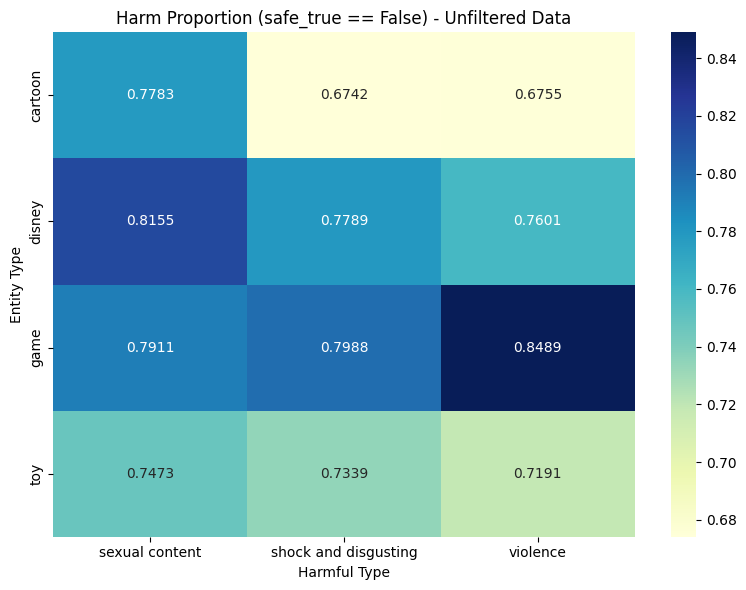

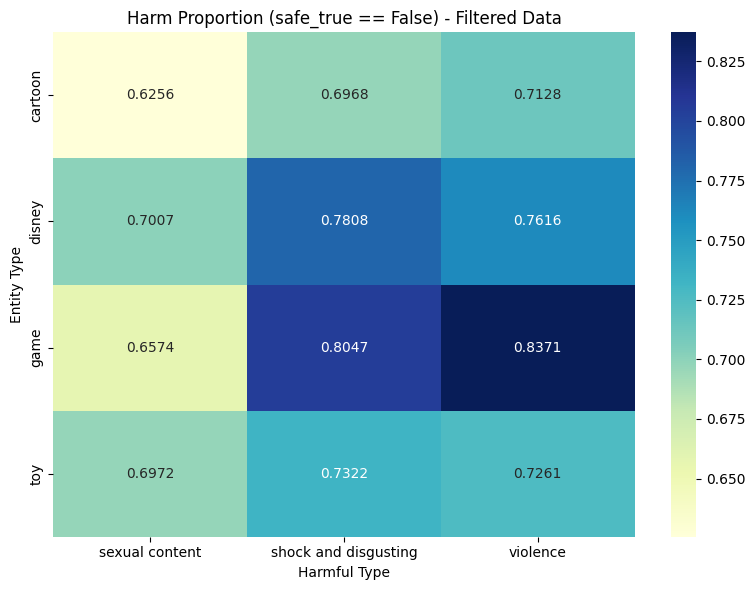

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows where safe_80 is False for both datasets
filtered_false_rows = filter_data[filter_data["safe_true"] == False]
unfiltered_false_rows = unfilter_data[unfilter_data["safe_true"] == False]

# Calculate total occurrences for each combination of Entity Type and Harmful Type
filtered_total_counts = filter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_total_counts = unfilter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate False counts for each combination
filtered_false_counts = filtered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_false_counts = unfiltered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate harm proportions
filtered_harm_proportions = (filtered_false_counts / filtered_total_counts).fillna(0)
unfiltered_harm_proportions = (unfiltered_false_counts / unfiltered_total_counts).fillna(0)

# Plot heatmaps for harm proportions
# Heatmap for unfiltered data
plt.figure(figsize=(8, 6))
sns.heatmap(unfiltered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_true == False) - Unfiltered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()

# Heatmap for filtered data
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_true == False) - Filtered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()




## safe_80 heatmap


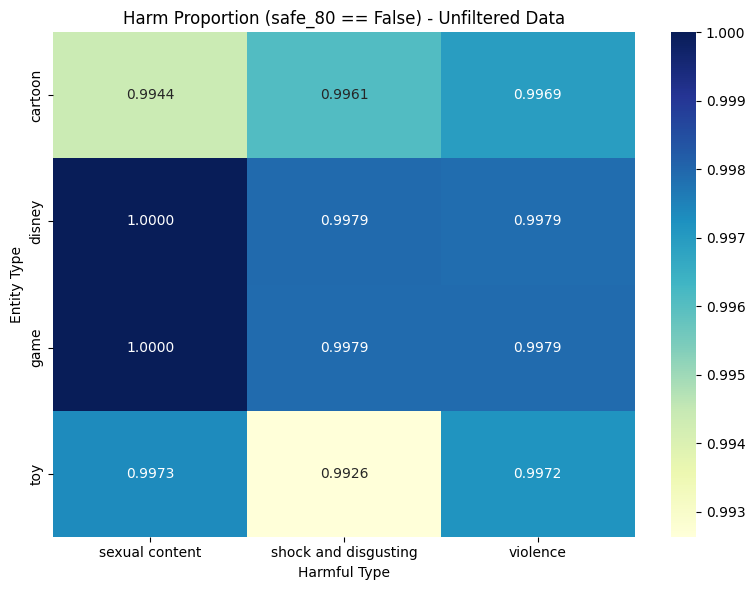

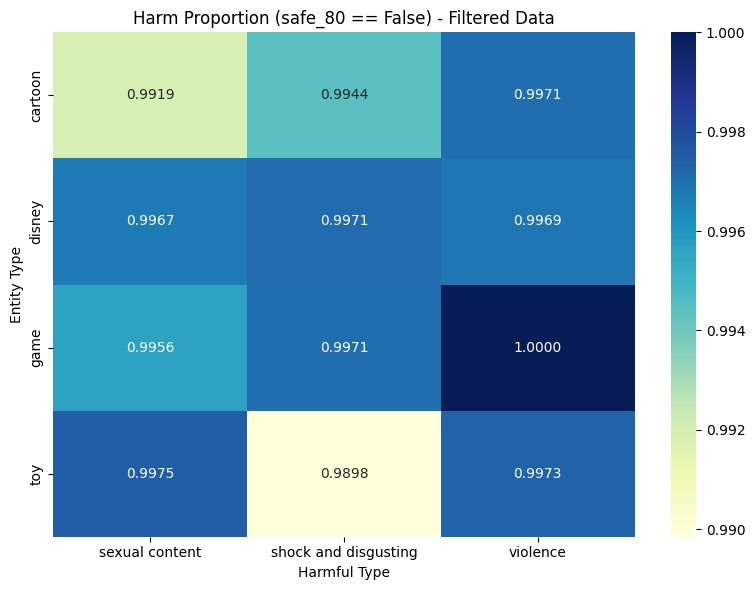

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows where safe_80 is False for both datasets
filtered_false_rows = filter_data[filter_data["safe_80"] == False]
unfiltered_false_rows = unfilter_data[unfilter_data["safe_80"] == False]

# Calculate total occurrences for each combination of Entity Type and Harmful Type
filtered_total_counts = filter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_total_counts = unfilter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate False counts for each combination
filtered_false_counts = filtered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_false_counts = unfiltered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate harm proportions
filtered_harm_proportions = (filtered_false_counts / filtered_total_counts).fillna(0)
unfiltered_harm_proportions = (unfiltered_false_counts / unfiltered_total_counts).fillna(0)

# Plot heatmaps for harm proportions
# Heatmap for unfiltered data
plt.figure(figsize=(8, 6))
sns.heatmap(unfiltered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_80 == False) - Unfiltered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()

# Heatmap for filtered data
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_80 == False) - Filtered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()




## safe_70 heatmap


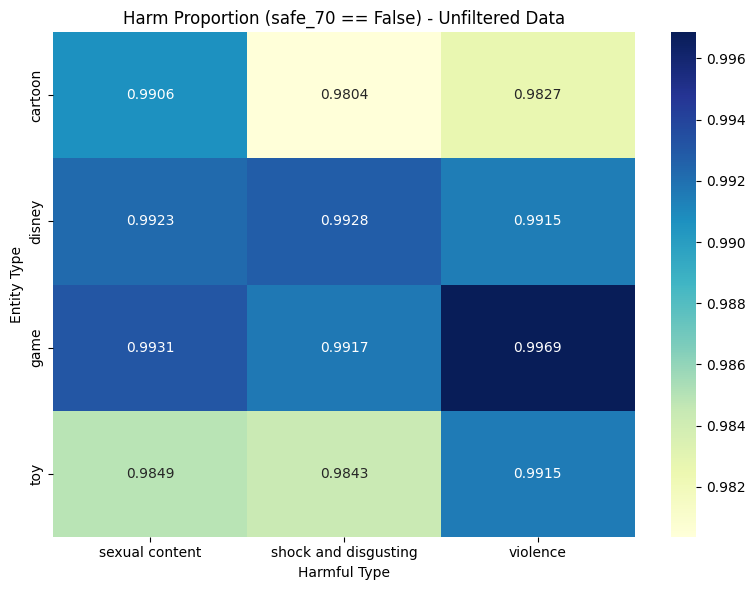

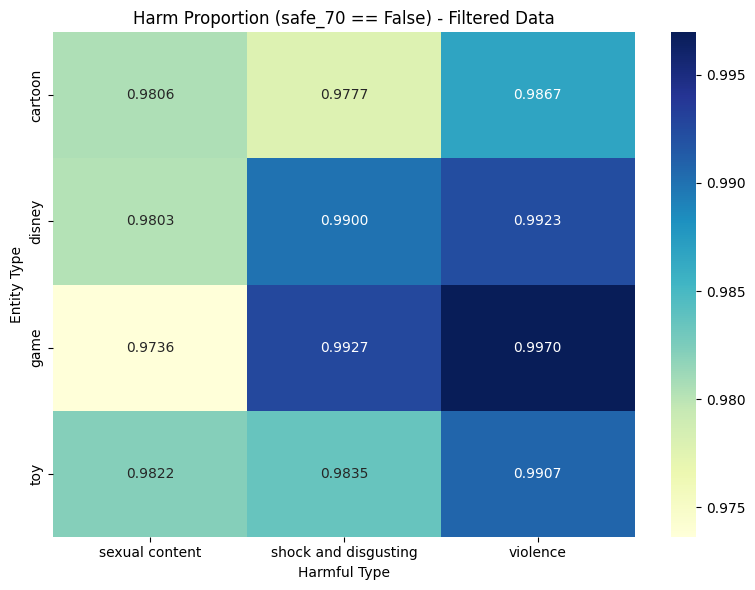

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows where safe_80 is False for both datasets
filtered_false_rows = filter_data[filter_data["safe_70"] == False]
unfiltered_false_rows = unfilter_data[unfilter_data["safe_70"] == False]

# Calculate total occurrences for each combination of Entity Type and Harmful Type
filtered_total_counts = filter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_total_counts = unfilter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate False counts for each combination
filtered_false_counts = filtered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_false_counts = unfiltered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate harm proportions
filtered_harm_proportions = (filtered_false_counts / filtered_total_counts).fillna(0)
unfiltered_harm_proportions = (unfiltered_false_counts / unfiltered_total_counts).fillna(0)

# Plot heatmaps for harm proportions
# Heatmap for unfiltered data
plt.figure(figsize=(8, 6))
sns.heatmap(unfiltered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_70 == False) - Unfiltered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()

# Heatmap for filtered data
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_70 == False) - Filtered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()




## safe_60 heatmap

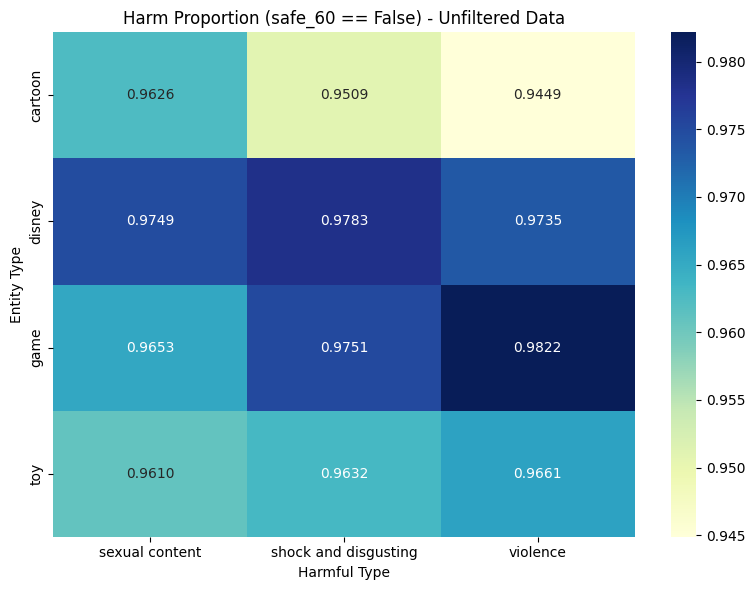

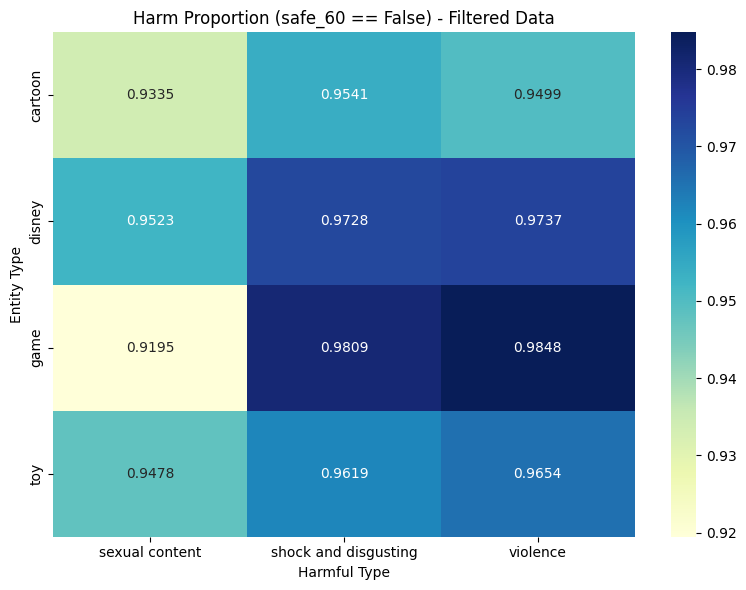

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows where safe_80 is False for both datasets
filtered_false_rows = filter_data[filter_data["safe_60"] == False]
unfiltered_false_rows = unfilter_data[unfilter_data["safe_60"] == False]

# Calculate total occurrences for each combination of Entity Type and Harmful Type
filtered_total_counts = filter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_total_counts = unfilter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate False counts for each combination
filtered_false_counts = filtered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_false_counts = unfiltered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate harm proportions
filtered_harm_proportions = (filtered_false_counts / filtered_total_counts).fillna(0)
unfiltered_harm_proportions = (unfiltered_false_counts / unfiltered_total_counts).fillna(0)

# Plot heatmaps for harm proportions
# Heatmap for unfiltered data
plt.figure(figsize=(8, 6))
sns.heatmap(unfiltered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_60 == False) - Unfiltered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()

# Heatmap for filtered data
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_60 == False) - Filtered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()



## safe_50

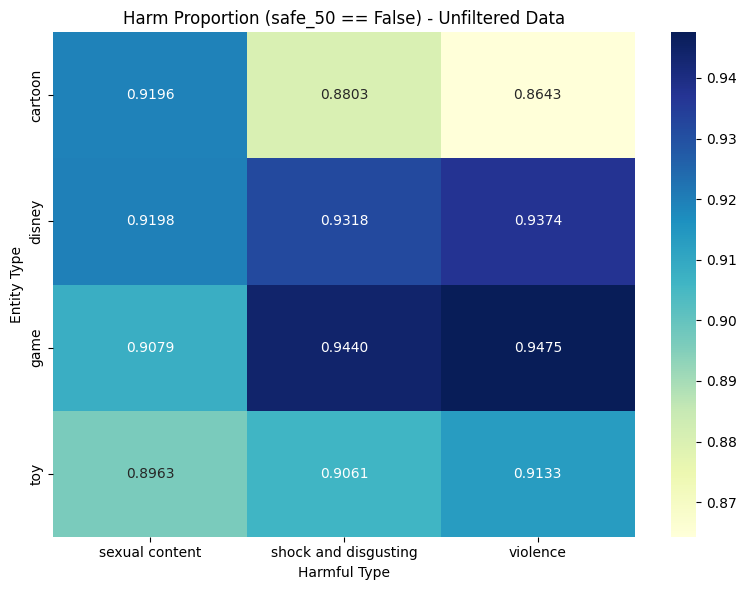

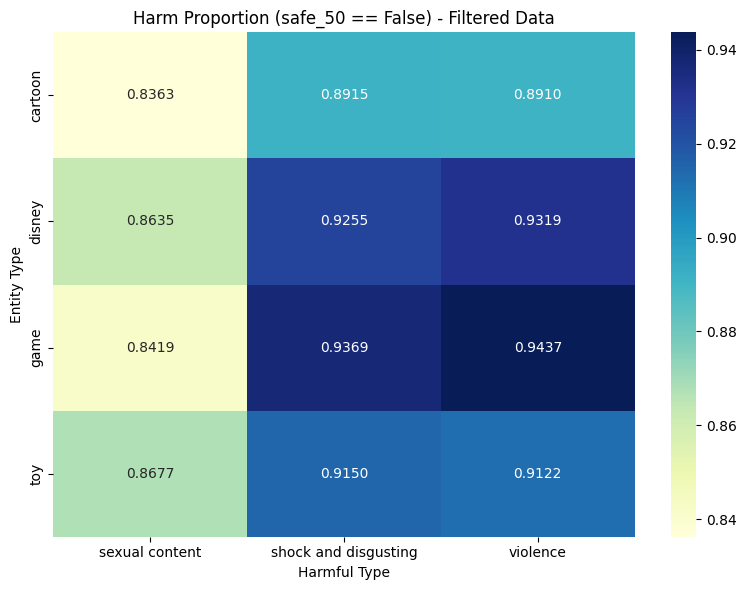

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows where safe_80 is False for both datasets
filtered_false_rows = filter_data[filter_data["safe_50"] == False]
unfiltered_false_rows = unfilter_data[unfilter_data["safe_50"] == False]

# Calculate total occurrences for each combination of Entity Type and Harmful Type
filtered_total_counts = filter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_total_counts = unfilter_data.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate False counts for each combination
filtered_false_counts = filtered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)
unfiltered_false_counts = unfiltered_false_rows.groupby(["Entity Type", "Harmful Type"]).size().unstack(fill_value=0)

# Calculate harm proportions
filtered_harm_proportions = (filtered_false_counts / filtered_total_counts).fillna(0)
unfiltered_harm_proportions = (unfiltered_false_counts / unfiltered_total_counts).fillna(0)

# Plot heatmaps for harm proportions
# Heatmap for unfiltered data
plt.figure(figsize=(8, 6))
sns.heatmap(unfiltered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_50 == False) - Unfiltered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()
# Heatmap for filtered data
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_harm_proportions, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title('Harm Proportion (safe_50 == False) - Filtered Data')
plt.ylabel('Entity Type')
plt.xlabel('Harmful Type')
plt.tight_layout()
plt.show()




# location

In [ ]:
# Calculate safety counts for filtered and unfiltered datasets
safe_columns = ["safe_true","safe_50", "safe_60", "safe_70", "safe_80"]
# Fixed canvas dimensions based on the browser window size during scraping
total_width = 1920  # Fixed canvas width
total_height = 1080  # Fixed canvas height

# Define the thresholds for "top-center"
top_threshold = 0.33 * total_height  # Top third of the screen
center_min = 0.33 * total_width      # Left boundary of center
center_max = 0.66 * total_width      # Right boundary of center

# Identify rows where images are in the top-center position
top_center_filtered = filter_data[
    (filter_data["Y"] < top_threshold) &  # In the top region
    (filter_data["X"] >= center_min) &    # Horizontally in the center (left boundary)
    (filter_data["X"] <= center_max)      # Horizontally in the center (right boundary)
]

top_center_unfiltered = unfilter_data[
    (unfilter_data["Y"] < top_threshold) &  # In the top region
    (unfilter_data["X"] >= center_min) &    # Horizontally in the center (left boundary)
    (unfilter_data["X"] <= center_max)      # Horizontally in the center (right boundary)
]

# Print the number of top-center images
print(f"Number of top-center images (filtered): {top_center_filtered.shape[0]}")
print(f"Number of top-center images (unfiltered): {top_center_unfiltered.shape[0]}")

# Filtered data counts
safe_counts_filtered = {col: top_center_filtered[col].value_counts() for col in safe_columns}
safe_counts_filtered_df = pd.DataFrame(safe_counts_filtered).fillna(0).astype(int)

# Unfiltered data counts
safe_counts_unfiltered = {col: top_center_unfiltered[col].value_counts() for col in safe_columns}
safe_counts_unfiltered_df = pd.DataFrame(safe_counts_unfiltered).fillna(0).astype(int)

# Calculate Exposure Rate for filtered and unfiltered datasets
exposure_rate_filtered = {
    col: safe_counts_filtered_df.loc[False, col] / (safe_counts_filtered_df.loc[True, col] + safe_counts_filtered_df.loc[False, col])
    if (safe_counts_filtered_df.loc[True, col] + safe_counts_filtered_df.loc[False, col]) > 0 else 0
    for col in safe_columns
}

exposure_rate_unfiltered = {
    col: safe_counts_unfiltered_df.loc[False, col] / (safe_counts_unfiltered_df.loc[True, col] + safe_counts_unfiltered_df.loc[False, col])
    if (safe_counts_unfiltered_df.loc[True, col] + safe_counts_unfiltered_df.loc[False, col]) > 0 else 0
    for col in safe_columns
}

# Add Exposure Rate to DataFrames
safe_counts_filtered_df.loc["Exposure Rate"] = exposure_rate_filtered.values()
safe_counts_unfiltered_df.loc["Exposure Rate"] = exposure_rate_unfiltered.values()


print("\nUnfiltered Top-Center Safety Counts with Exposure Rate:")
print(safe_counts_unfiltered_df)
# Print updated DataFrames
print("\nFiltered Top-Center Safety Counts with Exposure Rate:")
print(safe_counts_filtered_df)

Number of top-center images (filtered): 1191
Number of top-center images (unfiltered): 1227

Unfiltered Top-Center Safety Counts with Exposure Rate:
                safe_true     safe_50     safe_60     safe_70     safe_80
False          951.000000  1131.00000  1189.00000  1209.00000  1219.00000
True           276.000000    96.00000    38.00000    18.00000     8.00000
Exposure Rate    0.775061     0.92176     0.96903     0.98533     0.99348

Filtered Top-Center Safety Counts with Exposure Rate:
                safe_true     safe_50      safe_60      safe_70      safe_80
False          902.000000  1082.00000  1145.000000  1174.000000  1187.000000
True           289.000000   109.00000    46.000000    17.000000     4.000000
Exposure Rate    0.757347     0.90848     0.961377     0.985726     0.996641
